# <a id='toc1_'></a>[Introduction](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Libraries](#toc2_)    
- [Reading and assessing the data](#toc3_)    
  - [Basic info](#toc3_1_)    
- [Missing data](#toc4_)    
  - [Missing data conclusion](#toc4_1_)    
- [Chemical Nature and Routes of Administration](#toc5_)    
  - [Plots of number of structures x each boolean flag](#toc5_1_)    
  - [Conclusion](#toc5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This notebook serves as a straightforward and concise showcase of our dataset, designed for various applications within the research group, including possible virtual screening and repurposing. It provides essential information in the following sections:

# <a id='toc2_'></a>[Libraries](#toc0_)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import session_info

# <a id='toc3_'></a>[Reading and assessing the data](#toc0_)

After doing the process of stripping salts, neutralizing the structures, generating canonical SMILES and dropping the duplicates by using both the `SMILES` and `InChI` (the latter generated by Open Babel), we can explore basic information about the dataset. The first thing we must do is to read the data cleaned from `05_removing_repeated_molecules.ipynb`. All the variables present in the dataset, and respective `variable_type` are printed in the code chunk below:

**If you are not interested** in the code, just jump to the `Basic Info` topic of this section. 

In [2]:
approved_drugs = pd.read_csv('../../data/pre_cleaned_datasets/pre_cleaned_unique.csv')

# Checking basic info, name of the columns and type of variables
print(approved_drugs.shape)
approved_drugs.info() # Consider 'object' type as a simples 'string' variable type

(1895, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  1895 non-null   object
 1   chembl_id             1895 non-null   object
 2   clean_smiles          1895 non-null   object
 3   first_approval_year   1895 non-null   object
 4   indication_class      1450 non-null   object
 5   molecule_type         1895 non-null   object
 6   withdrawn_flag        1895 non-null   bool  
 7   therapeutic_flag      1895 non-null   bool  
 8   polymer_flag          1895 non-null   bool  
 9   inorganic_flag        1895 non-null   bool  
 10  natural_product_flag  1895 non-null   bool  
 11  oral                  1895 non-null   bool  
 12  parenteral            1895 non-null   bool  
 13  topical               1895 non-null   bool  
dtypes: bool(8), object(6)
memory usage: 103.8+ KB


## <a id='toc3_1_'></a>[Basic info](#toc0_)

General aspects of the dataset: 
* There are 1895 FDA approved drugs in this dataset.
* Chemical structures in SMILES format are in the `clean_smiles` column. The chemical structures were salt-stripped, neutralized ,canonilzed, and removed duplicates.
* Each structure has a name and ChEMBL ID for cross-information gathering using `chembl_id` or the `name`.
* Approval year is available for time series analysis.
* Indication class is provided in the `indication_class` column, but there is missing information and info are not standardize.
* Various boolean flags related to chemical nature (polymer/inorganic) and route of administration (oral, parenteral, topical) are present.

# <a id='toc4_'></a>[Missing data](#toc0_)

Some entries have 'not found' approval year, and that does not count as a true 'NA' value, and we have to replace it temporarily for a true 'NA' value. We can do this by using the `replace()` method. **If you're not interested in the code** just jump to the `Conclusion` topic in this section.

In [3]:
print(f"Some entries have 'not found' approval year, exactly: {approved_drugs[approved_drugs['first_approval_year'] == 'not found'].shape[0]} structures")

Some entries have 'not found' approval year, exactly: 235 structures


In [4]:
approved_drugs['first_approval_year'] = approved_drugs['first_approval_year'].replace(to_replace='not found', value=np.nan)
print(f"Number of 'not found' values replaced to NAs: {approved_drugs['first_approval_year'].isna().sum()}")

Number of 'not found' values replaced to NAs: 235


Ok, then we can perform the 'missing data' heatmap. In order to see how much information we're missing in our dataset, we can use the seaborn library to quickly assess how much missing data we have.

Text(0.5, 1.0, 'Missing data entires (highlight in blue)')

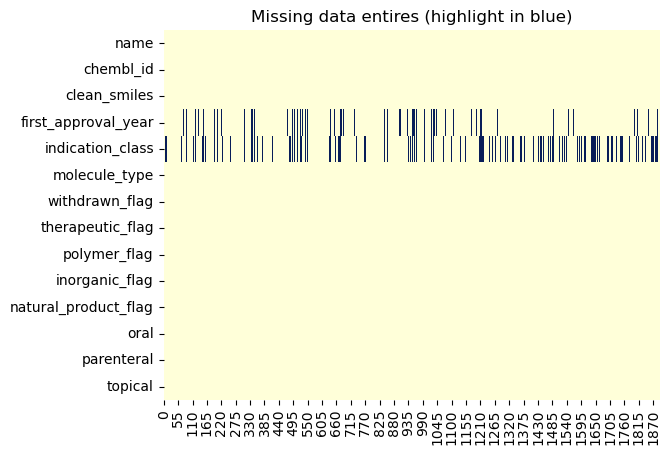

In [5]:
g = sns.heatmap(approved_drugs.isna().transpose(), cmap="YlGnBu", cbar=False)
g.set_title('Missing data entires (highlight in blue)')

Now we can do the 'not found' replacing stuff all again by using the `replace()` method:

In [6]:
approved_drugs['first_approval_year'] = approved_drugs['first_approval_year'].replace(to_replace=np.nan, value='not found')
approved_drugs['first_approval_year'].isna().sum() # Checking if the NAs values are NAs no more

0

So we're back with the original dataset with 'not found' entry when first approval year was not found.

## <a id='toc4_1_'></a>[Missing data conclusion](#toc0_)

* There are not a lot of missing information (yay!). 
* The only two columns that have some information missing are the `first_approval_year` and the `indication_class`, the last more critical.

# <a id='toc5_'></a>[Chemical Nature and Routes of Administration](#toc0_)

In this section we investigate all the boolean flags in our dataset. They all are relating to the chemical nature (polymer/inorganic), drug nature (withdrawn/therapeutic) and the route of administration (oral/parenteral/topical). 

First we need to perform a `value_counts()` of each column, to count the number of true/false. The function below does exactly that:

In [7]:
def count_bool_values(df:pd.DataFrame) -> pd.DataFrame:
    """
    This function returns a value_counts() dataframe, result of multiple boolean columns
    """
    counts = {}
    for column in df.columns:
        counts[column] = df[column].value_counts()
    return pd.DataFrame(counts)

Applying the function we obtain another dataframe and then performing some basic operations to properly make a bunch of subplots: 

In [8]:
# We count only bool type columns using select_dtypes method
bool_count_df = count_bool_values(approved_drugs.select_dtypes(include=['bool']))

# Filling the NA values and replacing it with zero
bool_count_df.fillna(0, inplace=True)

# Reseting the index to make true/false the index (it was the row name)
bool_count_df.reset_index(inplace=True)
bool_count_df

,index,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,oral,parenteral,topical
0,False,1778,0.0,1895.0,1895.0,1376,718,1394,1550
1,True,117,1895.0,0.0,0.0,519,1177,501,345


Some comments: in order to make our life easier, we fill the NaN (not a number) values present in the `bool_count_df` to 0 so we can perform multiple bar charts of the relative True/False values. Then we reset the index so the True/False could be a column 'index' which is going to be the label.

Finally plotting each column to a barplot. Using a function that starts with the second column (`withdrawn_flag`):

## <a id='toc5_1_'></a>[Plots of number of structures x each boolean flag](#toc0_)

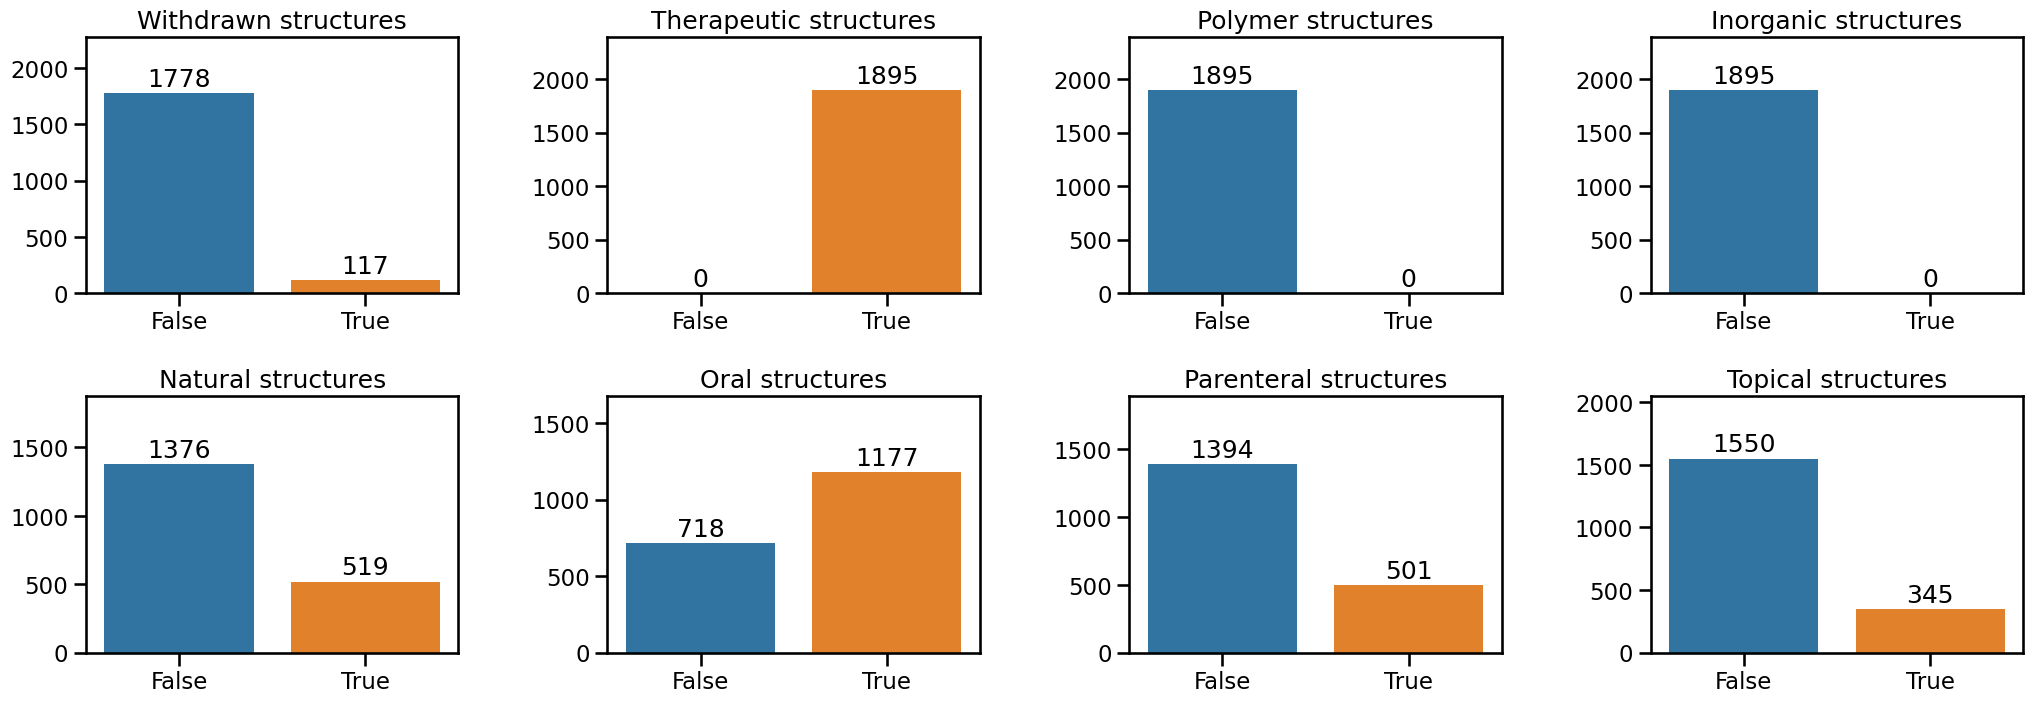

In [9]:
sns.set_context('talk')
fig, axes = plt.subplots(2, 4, figsize=(25, 8), sharey=False)
axes = axes.flatten()

for i, column in enumerate(bool_count_df.columns[1:]):
    sns.barplot(x='index', y=column, data=bool_count_df, ax=axes[i])
    axes[i].set_title(f'{column.split("_")[0].capitalize()} structures')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

    y_max = bool_count_df[column].max() + 500 # Setting the y_max so there is more headspace
    axes[i].set_ylim(0, y_max)
     # Annotate each bar with its corresponding y-value
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

plt.subplots_adjust(hspace=0.4, wspace=0.4)

## <a id='toc5_2_'></a>[Conclusion](#toc0_)

The main conclusion of this section are:

* Not a lot of withdrawn structures (that can be a problem in visualization or prediction with this variable)
* There are a lote of structures that are oral (~62%), which is almost a balanced dataset.
* Considerable amount of natural structures (maybe investigate the fragments?)
* We could play a little with modeling topical structures despite being only ~18% of the dataset. It could be interesting.
* We could develop an inverse modeling of parenteral structures (maybe a dumb idea)

In [10]:
session_info.show()